# Condition numbers

In numerical computing, we constantly make small errors in representing real numbers and the operations on them. Consequently we need to know whether the problems we want to solve are very sensitive to perturbations. The condition number measures this senstivity.


## Polynomial roots

The roots of a polynomial become sensitive to the values of the coefficients in the monomial basis when roots are relatively close to one another. Consider, for example,

In [3]:
p = poly([1,1,1,0.4,2.2]);         % polynomial with these as roots
q = p + 1e-12*randn(1,6);          % small changes to its coefficients
roots(q)

ans =
   2.2000 + 0.0000i
   1.0002 + 0.0000i
   0.9999 + 0.0002i
   0.9999 - 0.0002i
   0.4000 + 0.0000i


You can see that the triple root at 1 changed a lot more than the size of the perturbation would suggest; the other two roots changed by an amount less than $10^{-9}$. The effect of bad conditioning can be more dramatically shown using the _Wilkinson polynomial_. 

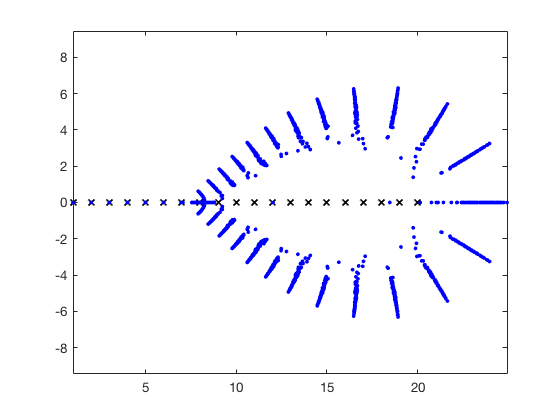

In [5]:
p = poly(1:20);
plot(1:20,0,"kx")
hold on
for k = 1:200
    q = p + 1e-6*randn(1,21);  
    r = roots(q);
    plot(real(r),imag(r),"b.")
end
axis("equal")

Clearly, having roots close together is not the only way to get sensitivity in the roots. 

## Matrix condition number

We have particular interest in the condition number of the problem "given square matrix $A$ and vector $b$, find vector $x$ such that $Ax=b$." More simply: "map $b$ to $A^{-1}b$." The relative condition number of this problem is bounded above by the *matrix condition number* $\kappa(A)=\|A\|\,\|A^{-1}\|$. Furthermore, in any particular case there exist perturbations to the data such that the upper bound is achieved. 

In [6]:
A = hilb(5)
kappa = cond(A)

A =
    1.0000    0.5000    0.3333    0.2500    0.2000
    0.5000    0.3333    0.2500    0.2000    0.1667
    0.3333    0.2500    0.2000    0.1667    0.1429
    0.2500    0.2000    0.1667    0.1429    0.1250
    0.2000    0.1667    0.1429    0.1250    0.1111
kappa =
   4.7661e+05


The importance of _relative_ condition numbers is that they explain accuracy in dimensionless terms, i.e. significant digits. This condition number says we could "lose" up to 5 or so digits in the passage from data to result. So we make relative perturbations to $b$ and see the relative effect on the result.

In [10]:
perturb = @(z,ep) z.*(1 + ep*(2*rand(size(z))-1));
x = 0.3 + (1:5)';  b = A*x;

maxerr = -Inf;
toterr = 0;
for k = 1:50000
    bb = perturb(b,1e-12);
    err = norm(A\bb - x)/norm(x);
    maxerr = max(maxerr,err);
    toterr = toterr + err;
end
fprintf(" average relative error = %.2e\n",(toterr/50000))
fprintf(" max relative error found = %.2e\n",maxerr)
fprintf(" condition number bound = %.2e\n",(1e-12*kappa));

 average relative error = 4.89e-08
 max relative error found = 1.76e-07
 condition number bound = 4.77e-07


The same holds for perturbations to $A$, though the error has higher-order terms that vanish only in the limit of infinitesimal perturbations.

In [11]:
maxerr = -Inf;
toterr = 0;
for k = 1:50000
    AA = perturb(A,1e-12);
    err = norm(AA\b - x)/norm(x);
    maxerr = max(maxerr,err);
    toterr = toterr + err;
end
fprintf(" average relative error = %.2e\n",(toterr/50000))
fprintf(" max relative error found = %.2e\n",maxerr)
fprintf(" condition number bound = %.2e\n",(1e-12*kappa));

 average relative error = 2.18e-08
 max relative error found = 1.08e-07
 condition number bound = 4.77e-07
